In [1]:
#import libraries
import pandas as pd #data analysis and manipulation
import numpy as np #math manipulation if required
from statsmodels.graphics.gofplots import qqplot # for qq plots

#for visuals
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#load data and make copy for all analysis
data = pd.read_csv('train.csv')
copy = data.copy()


# Data Overview

A bird's eye view.

In [4]:
#get dimensions
copy.shape

(891, 12)

In [12]:
#get a view of the ddf
copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#get feature name, data, types and non null values
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#check number of nulls
copy.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#get percentage of nulls per features
(copy.isna().sum() / len(copy) * 100).round(2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [6]:
#check for duplicates
copy.duplicated().sum()

#note if duplicates present use the following:
#your_df = your_df.drop_duplicates()

0

In [10]:
#summary statisitics for numerical data
copy.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
#summary stats for categorical data
copy.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


The purpose of this step is to get eyes on the dataset and forumlate a plan to eventually develop insights

In sum , you should be able to answer the following:
- What is the shape of the dataframe,
- What are the data types of the features,
- Are there duplicates
- Are there nulls? How many? Which feature?
- Identify areas for data cleaning
- Identify or think about some possible feature engineering possibilities if any.

# Data Cleaning and Wrangling

From above, we identified some areas to clean:
- Feature names - change to something more descriptive
- Change passenger id to str - could probably drop it now that we concluded there are no duplicates
- Nulls in a few categories
change feature names, change passenger id to str, drop nulls

Some of the feature names don't make the most sense like SibSp, but luckily the data comes with documentation and we can change the names. [Link](https://www.kaggle.com/competitions/titanic/data?select=train.csv) to documentation. 

We can also change the data type of PassengerId to str, we could probably even drop it as we already checked for duplicates.

We found there are no duplicates, 891 and 681 unique samples respectively for Names and Ticket. We can likely drop these are they are not applicable to our problem statement.

Ideally, you have a research question in mind and can identify relevent columns. Or if you have domain knowledge you can drop irrelevent columns. In this case, we can drop PassengerId, Name, and Ticket.

In [3]:
#drop unnecessary columns
copy = copy.drop(['PassengerId', 'Name', 'Ticket'], axis=1)



#change column names to full names as per documentation
copy = copy.rename(columns={'SibSp': '# Sibiling/Spouses Aboard',
                            'Parch': '# Parents/Children Aboard',
                            'Pclass': 'Passenger class'})

#dictionary for changing embarked values
embarked_dict = {'C': 'Cherbourg',
                 'Q': 'Queenstown',
                 'S': 'Southhampton'}

#change the Embarked values to full names
copy['Embarked'] = copy['Embarked'].replace(embarked_dict)


#Round Fare to two decimal places
copy['Fare'] = copy['Fare'].round(2)

#check work
copy.head()

,Survived,Passenger class,Sex,Age,# Sibiling/Spouses Aboard,# Parents/Children Aboard,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.25,NaN,Southhampton
1,1,1,female,38.0,1,0,71.28,C85,Cherbourg
2,1,3,female,26.0,0,0,7.92,NaN,Southhampton
3,1,1,female,35.0,1,0,53.10,C123,Southhampton
4,0,3,male,35.0,0,0,8.05,NaN,Southhampton


## Nulls

Nulls are fun. You can drop them or impute them in a variety of ways. How to handle nulls really depends on your research question(s) and data. Usually if a feature has too many nulls as we will see later, we can simply drop the feature.

### Dropping all nulls

Last resort and should rarely be considered due to the high potential for data loss

In [48]:
#remove all nulls

#make a copy
no_nulls = copy.copy()

#drop nulls by row - if null exists row dropped
no_nulls = no_nulls.dropna()

#calc data loss
new_size = no_nulls.shape[0]
old_size = copy.shape[0]
loss = np.abs(round(((new_size / old_size) - 1) * 100, 0))
print(f"You lost {loss} of your data by dropping all nulls")

You lost 79.0 of your data by dropping all nulls


We can see that by removing all nulls, we lost 79% of our data. That is a big loss of data regardless of how large our dataset is. This is why dropping all nulls is a last resort or quick and dirty method. 

### Imputation

Replacing the nulls with a value. Usually Mean or Median, but depends on the data.

Use Mean if the data is normally distributed and no outliers exist. Use Median for any other time. If you are unsure, you can use histograms and boxplots to determine the best course of action.

It is a good idea to consider histograms and boxplots to visualize the data prior to imputing. You don't have to do all the features just the ones with nulls

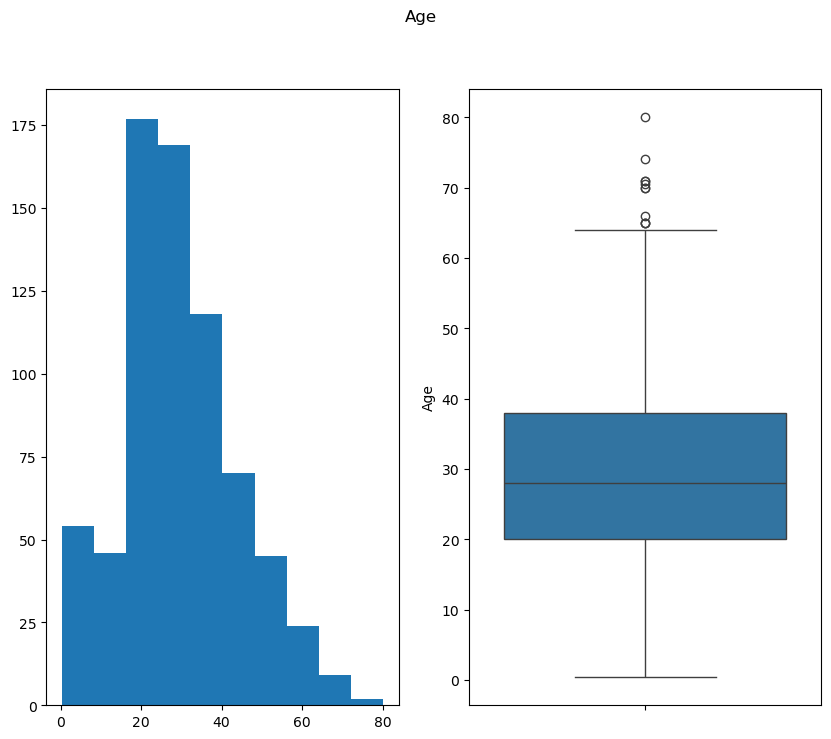

In [5]:
#Histograms and boxplots of Age
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
axs[0].hist(copy['Age'])
sns.boxplot(copy['Age'], ax=axs[1]) #if nulls exist they need to be removed manually first before using plt, sns does it automatically
#axs[1].boxplot(copy['Age']) #ignore this line, here for you to test and see what happens if nulls are present
plt.suptitle('Age')
plt.show()

So, we can see we have a somewhat skewed distribution and outliers. The mean in this case would be inappropriate as it is influenced by outliers, so the Median would be used. 

In [4]:
# median or mean imputation

copy['Age'] = copy['Age'].fillna(copy['Age'].median()) #use median because less influenced by outliers

#check
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Survived                   891 non-null    int64  
 1   Passenger class            891 non-null    int64  
 2   Sex                        891 non-null    object 
 3   Age                        891 non-null    float64
 4   # Sibiling/Spouses Aboard  891 non-null    int64  
 5   # Parents/Children Aboard  891 non-null    int64  
 6   Fare                       891 non-null    float64
 7   Cabin                      204 non-null    object 
 8   Embarked                   889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


We still have nulls in Embarked and Cabin. We can fill in Embarked with the mode or we can drop them. Dropping two rows isn't that big of a deal, but I'd rather keep them for now. 

Cabin on the otherhand has too many nulls to even consider imputing. The cost outweighs the benefit, so we can drop it.

In [5]:
#fill in Embarked
copy['Embarked'] = copy['Embarked'].fillna(copy['Embarked'].mode()[0]) #fill nan with mode

#check work
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Survived                   891 non-null    int64  
 1   Passenger class            891 non-null    int64  
 2   Sex                        891 non-null    object 
 3   Age                        891 non-null    float64
 4   # Sibiling/Spouses Aboard  891 non-null    int64  
 5   # Parents/Children Aboard  891 non-null    int64  
 6   Fare                       891 non-null    float64
 7   Cabin                      204 non-null    object 
 8   Embarked                   891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


Cabin has a lot of nulls and it is not worth the resources to try to impute them. Also, most people would have been on the deck after the collision, so cabin may not be relevant. In addition, Passenger Class and Fare would communicate Cabin anyways

In [6]:
#drop Cabin
copy = copy.drop('Cabin', axis=1)

In [17]:
copy.head()

,Survived,Passenger class,Sex,Age,# Sibiling/Spouses Aboard,# Parents/Children Aboard,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,Southhampton
1,1,1,female,38.0,1,0,71.28,Cherbourg
2,1,3,female,26.0,0,0,7.92,Southhampton
3,1,1,female,35.0,1,0,53.10,Southhampton
4,0,3,male,35.0,0,0,8.05,Southhampton


# Feature Engineering

Before moving on to Feature Analysis, I like to explore feature engineering if there are easily identified. You can always come back to this step as sometimes it difficult to engineer steps until after.

You may not use the feature at all, but it's worth exploring, but be careful not to go too far down the rabbit hole

For demonstration purposes, we will engineer a single feature. 

In [7]:
#engineer Family Size

copy['Family size'] = copy['# Sibiling/Spouses Aboard'] + copy['# Parents/Children Aboard']

copy.head()

,Survived,Passenger class,Sex,Age,# Sibiling/Spouses Aboard,# Parents/Children Aboard,Fare,Embarked,Family size
0,0,3,male,22.0,1,0,7.25,Southhampton,1
1,1,1,female,38.0,1,0,71.28,Cherbourg,1
2,1,3,female,26.0,0,0,7.92,Southhampton,0
3,1,1,female,35.0,1,0,53.10,Southhampton,1
4,0,3,male,35.0,0,0,8.05,Southhampton,0


We could go further and bin the family sizes, but it is beyond the scope here.

In [8]:
#export copy to csv for statistical analysis in another notebook
copy.to_csv('Clean file.csv', index=False)

# Feature Analysis

Univariate and multivariate. for inputs and target


## Univariate

Consider the following:
- Histograms,
- Q-Q plots
- Boxplots,
- Count graphs - bar or other

Important to consider what type of data you have. Is it Numerical - Continous or discrete - or is it categorical - nominal or ordinal. Not all graphs are equal.

### Bar graphs - Counts

There are two ways to do this. the easier method is using sns.countplot. The longer way is shown below.

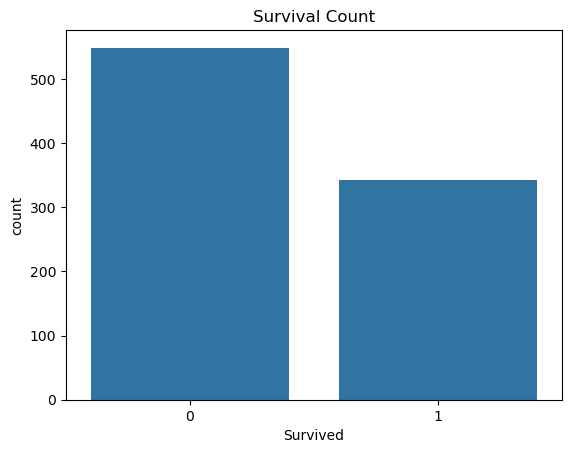

In [11]:
#counts for survival
sns.countplot(data=copy, x='Survived')
plt.title('Survival Count')
plt.show()

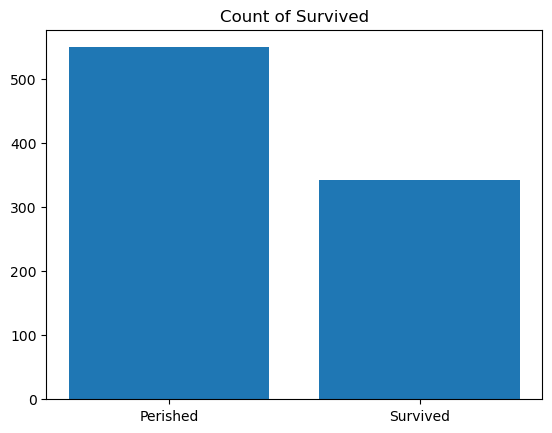

In [11]:
# counts for Survived
my_counts = copy['Survived'].value_counts()

#plot
plt.bar(my_counts.index, my_counts.values)
plt.xticks([0, 1], labels=['Perished', 'Survived'])
plt.title('Count of Survived')
plt.show()

Most people died on the Titanic...Even Leo

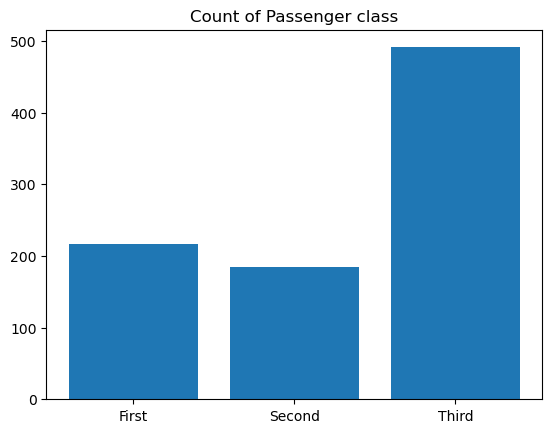

In [12]:
# counts for Passenger Class
my_counts = copy['Passenger class'].value_counts()

#plot
plt.bar(my_counts.index, my_counts.values)
plt.xticks([1, 2, 3], labels=['First', 'Second', 'Third'])
plt.title('Count of Passenger class')
plt.show()

Most passengers were third class

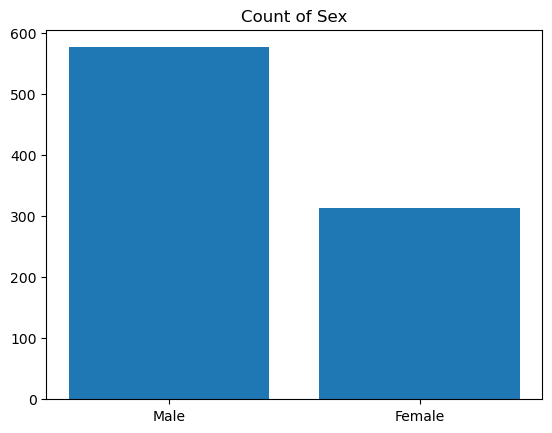

In [13]:
# Sex
my_counts = copy['Sex'].value_counts()

#plot
plt.bar(my_counts.index, my_counts.values)
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.title('Count of Sex')
plt.show()

Most passengers were male

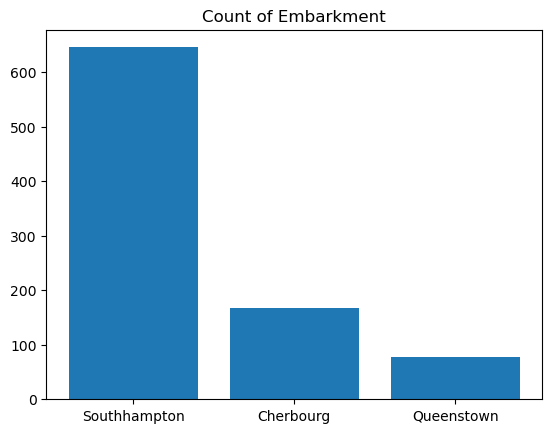

In [14]:
#embarked
my_counts = copy['Embarked'].value_counts()

#plot
plt.bar(my_counts.index, my_counts.values)
#plt.xticks()
plt.title('Count of Embarkment')
plt.show()

The majority of people embarked at Southhampton

### Histograms and Boxplots

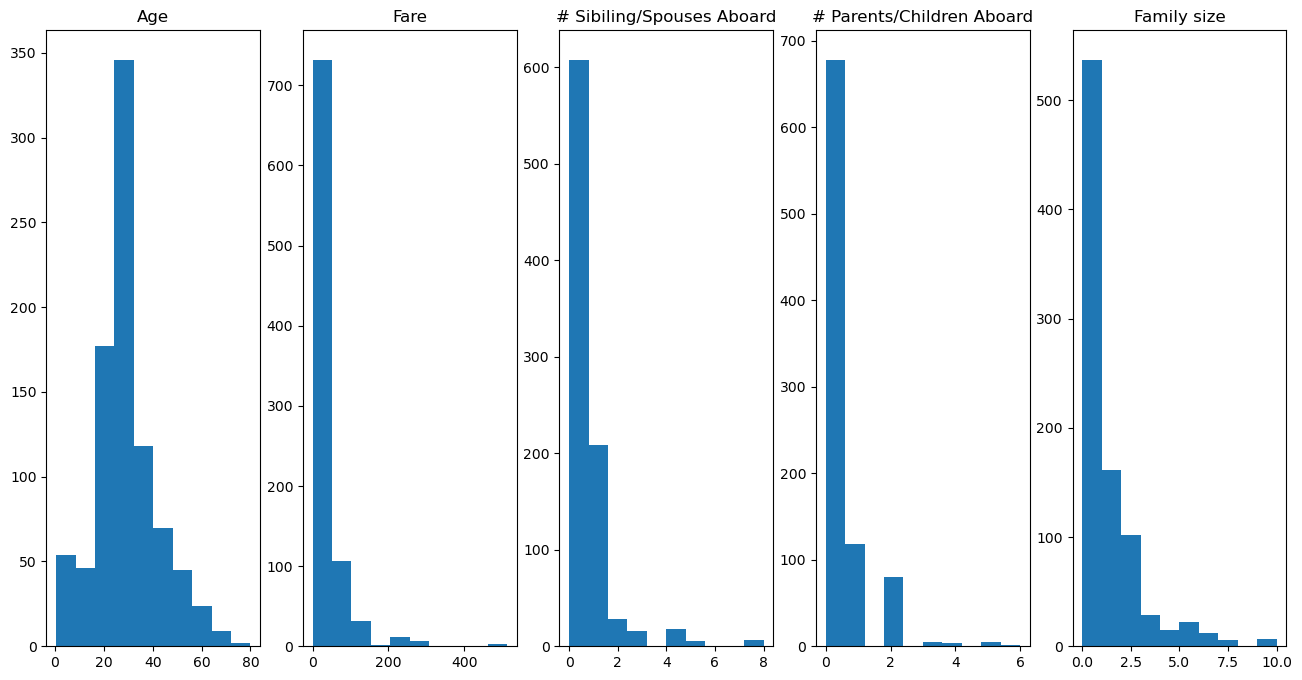

In [24]:

#histograms
fig1, axs1 = plt.subplots(nrows=1, ncols=5, figsize=(16, 8))

#plot age
axs1[0].hist(copy['Age'])
axs1[0].set_title('Age')

#plot Fare
axs1[1].hist(copy['Fare'])
axs1[1].set_title('Fare')

#plot Siblings/Spouses
axs1[2].hist(copy['# Sibiling/Spouses Aboard'])
axs1[2].set_title('# Sibiling/Spouses Aboard')

#plot Parents/children
axs1[3].hist(copy['# Parents/Children Aboard'])
axs1[3].set_title('# Parents/Children Aboard')

#Plot Family size
axs1[4].hist(copy['Family size'])
axs1[4].set_title('Family size')

plt.show()



Q-Q plots are a good supplement to histograms for assessing data distribution. Essentially the closer the data points are to the diagonal line, the more normal your data is.

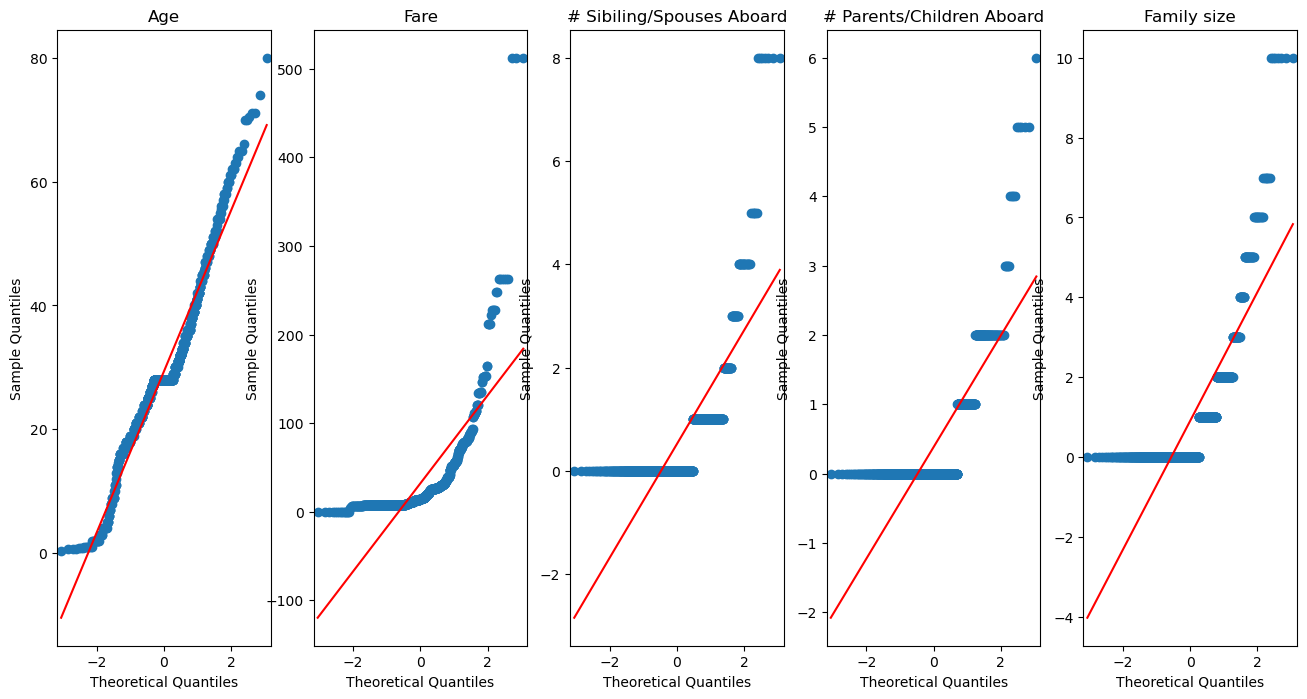

In [21]:
#QQ plots
fig1, axs1 = plt.subplots(nrows=1, ncols=5, figsize=(16, 8))

#plot age
qqplot(copy['Age'], line='s', ax=axs1[0])
axs1[0].set_title('Age')

#plot Fare
qqplot(copy['Fare'], line='s', ax=axs1[1])
axs1[1].set_title('Fare')

#plot Siblings/Spouses
qqplot(copy['# Sibiling/Spouses Aboard'], line='s', ax=axs1[2])
axs1[2].set_title('# Sibiling/Spouses Aboard')

#plot Parents/children
qqplot(copy['# Parents/Children Aboard'], line='s', ax=axs1[3])
axs1[3].set_title('# Parents/Children Aboard')

#Plot Family size
qqplot(copy['Family size'], line='s', ax=axs1[4])
axs1[4].set_title('Family size')

plt.show()



The Q-Q plots confirm the numerical data does not follow a normal distribution.

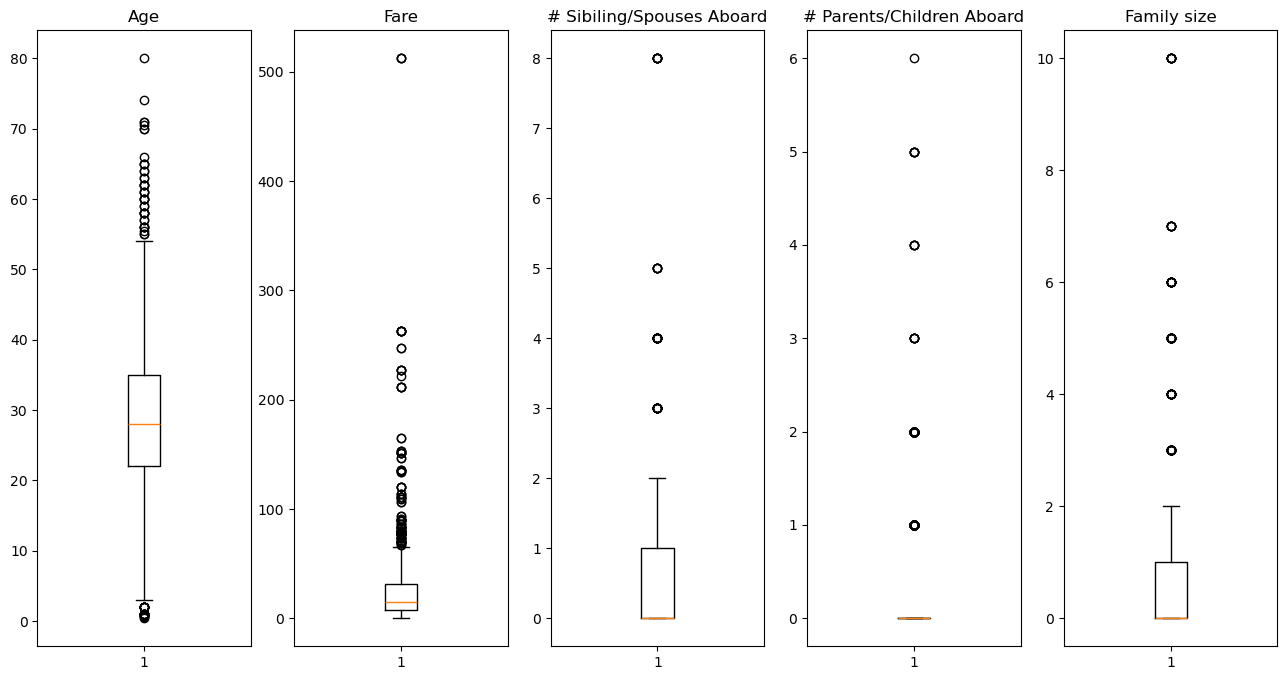

In [27]:
#boxplots
fig2, axs2 = plt.subplots(nrows=1, ncols=5, figsize=(16, 8))

#plot age
axs2[0].boxplot(copy['Age'])
axs2[0].set_title('Age')

#plot Fare
axs2[1].boxplot(copy['Fare'])
axs2[1].set_title('Fare')

#plot Siblings/Spouses
axs2[2].boxplot(copy['# Sibiling/Spouses Aboard'])
axs2[2].set_title('# Sibiling/Spouses Aboard')

#plot Parents/children
axs2[3].boxplot(copy['# Parents/Children Aboard'])
axs2[3].set_title('# Parents/Children Aboard')

#Plot Family size
axs2[4].boxplot(copy['Family size'])
axs2[4].set_title('Family size')

plt.show()

After univariate analysis, you should be able to answer the following:
- Data distribution,
- Presence of outliers,
- Breakdown of categorical data - Count graphs

## Multivariate Analysis

Comparing two or more variables

Heatmaps, Scatterplots/pairplots.

We have categorical data (Sex, Embarked) that needs some encoding.
- factorization is good for when order matters
- get dummies or onehotencoding if order doesnt matter

In [37]:
#make a copy
encoded_df = copy.copy()

#encode categorical values
dummy_df = pd.get_dummies(encoded_df[['Sex', 'Embarked']], dtype=int)


#concat df
encoded_df = pd.concat([encoded_df, dummy_df], axis=1)

#drop the original columns
encoded_df = encoded_df.drop(['Sex', 'Embarked'], axis=1)

#check work
encoded_df.head()

,Survived,Passenger class,Age,# Sibiling/Spouses Aboard,# Parents/Children Aboard,Fare,Family size,Sex_female,Sex_male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southhampton
0,0,3,22.0,1,0,7.25,1,0,1,0,0,1
1,1,1,38.0,1,0,71.28,1,1,0,1,0,0
2,1,3,26.0,0,0,7.92,0,1,0,0,0,1
3,1,1,35.0,1,0,53.10,1,1,0,0,0,1
4,0,3,35.0,0,0,8.05,0,0,1,0,0,1


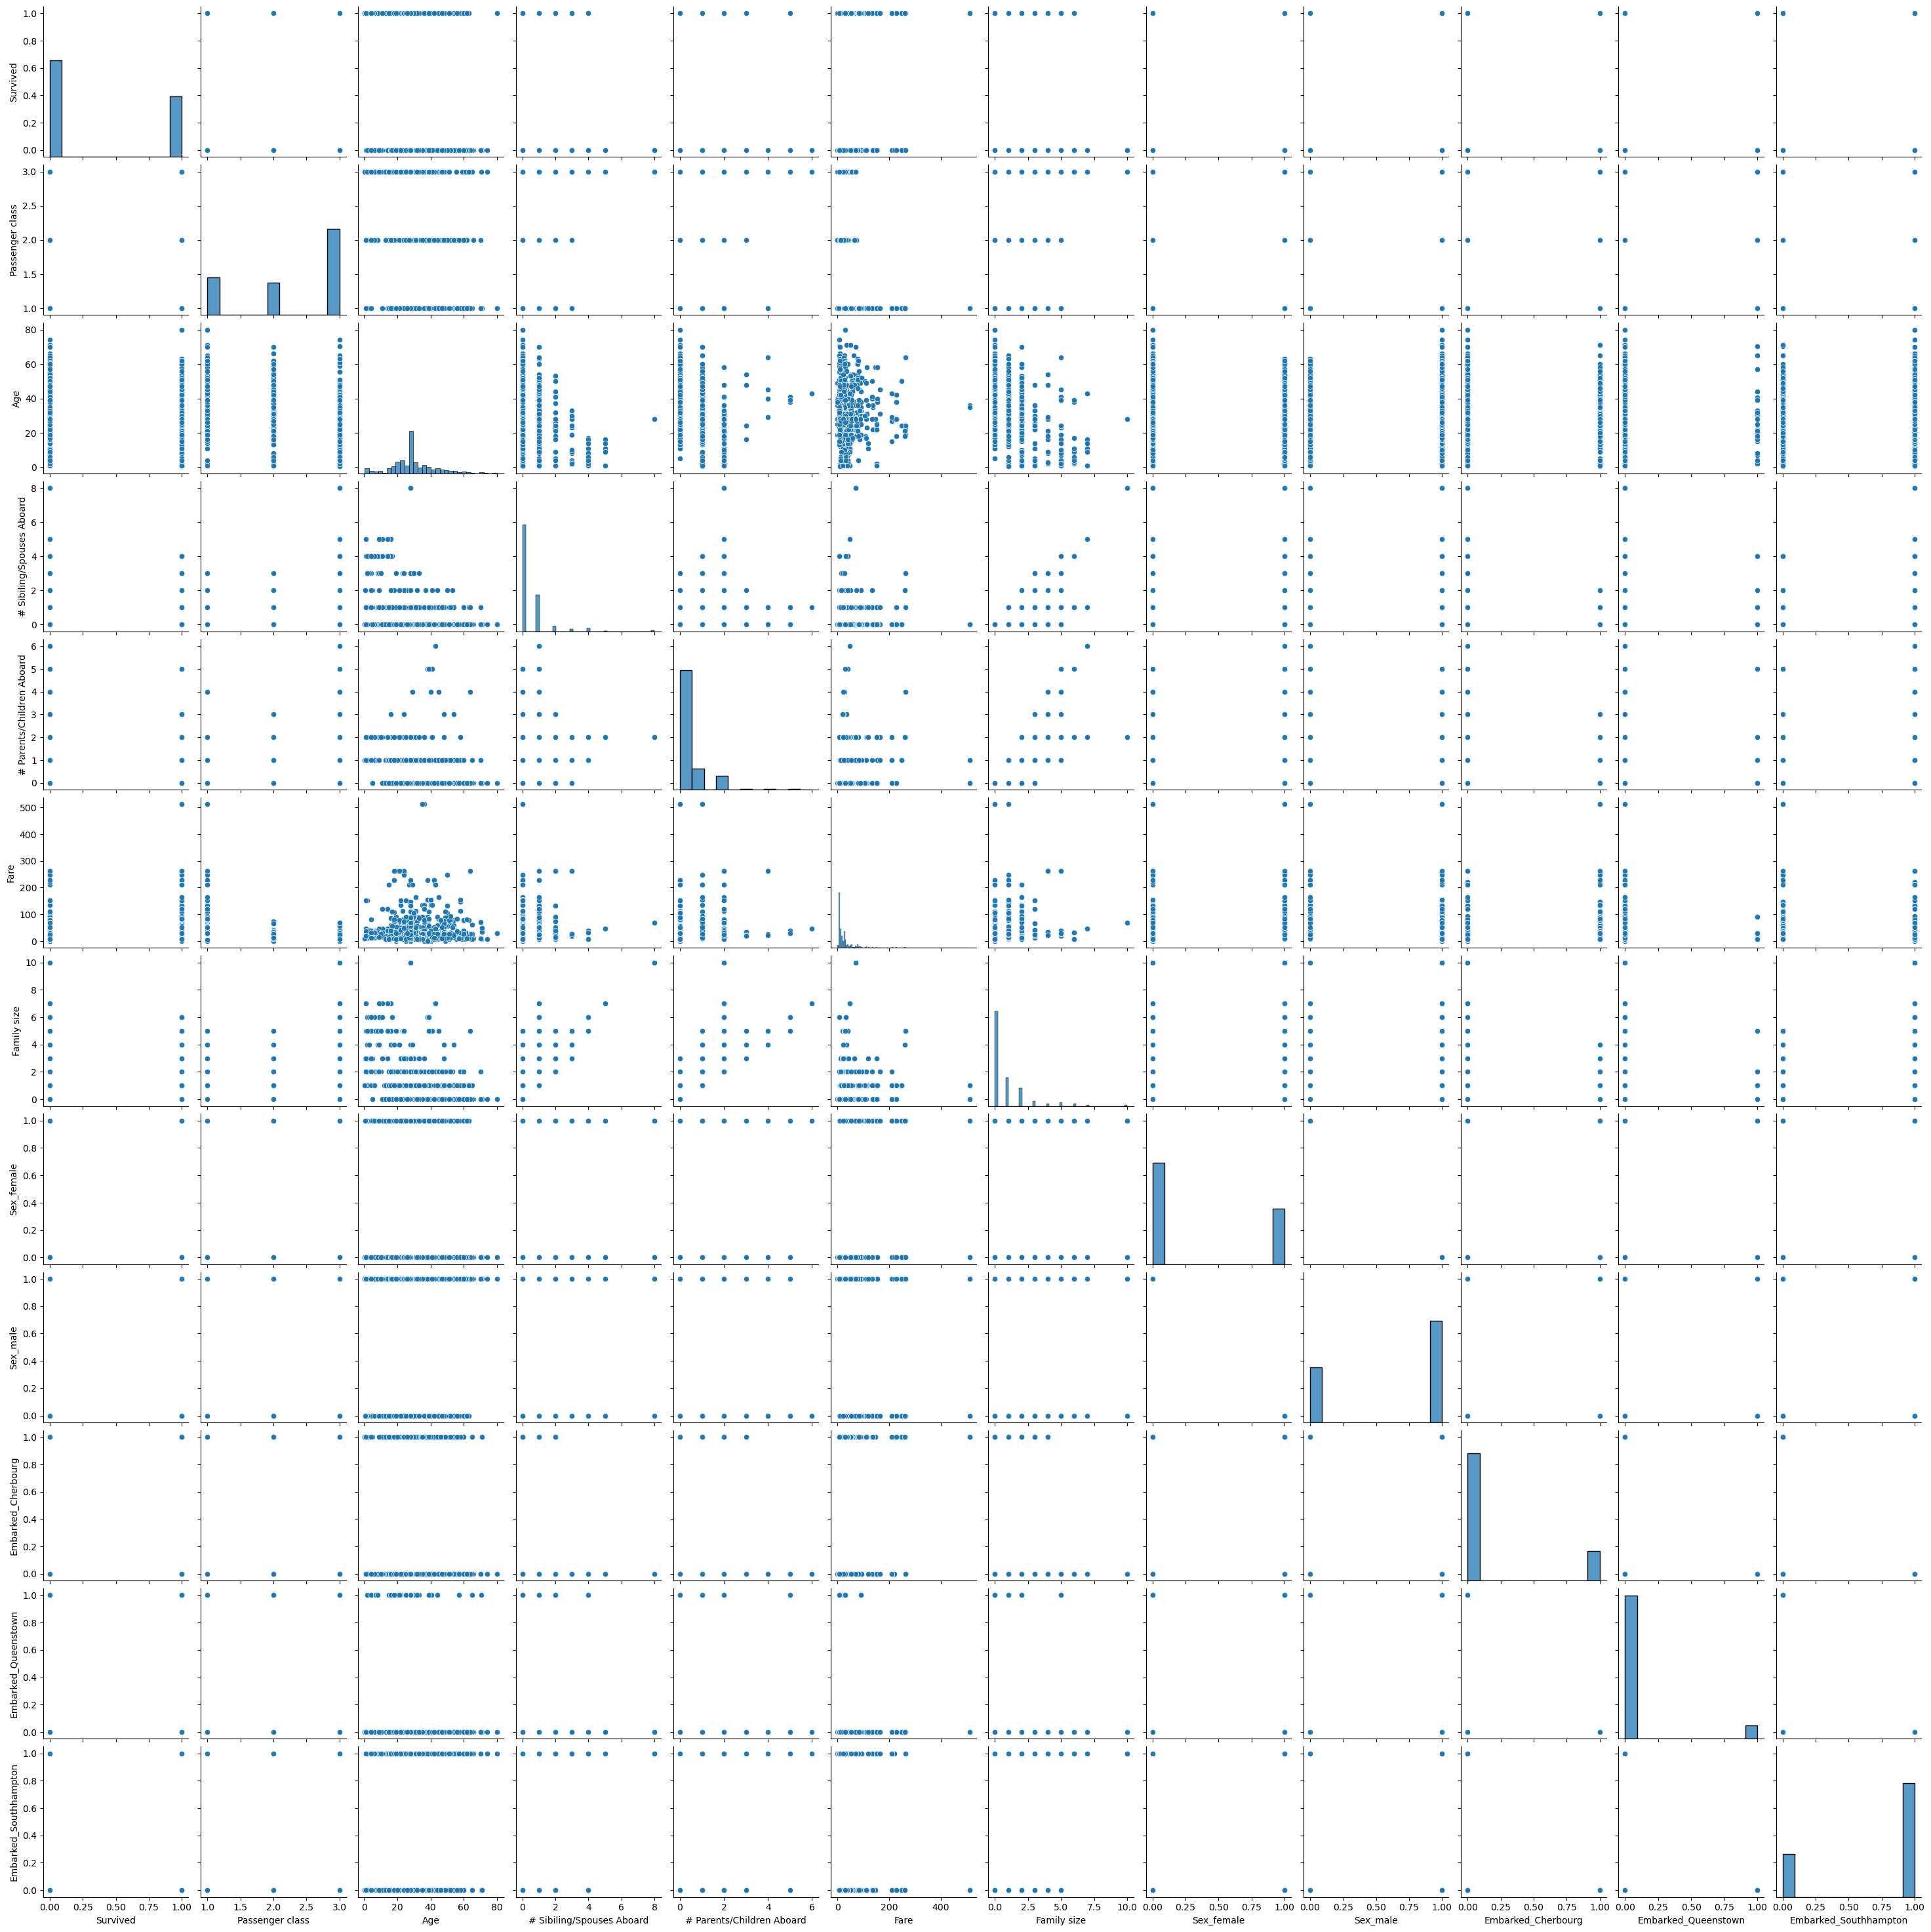

In [38]:
#pairplot
sns.pairplot(encoded_df)
plt.show()

Pairplots can get quite hectic. So scatter plots may be better if there are too many features.

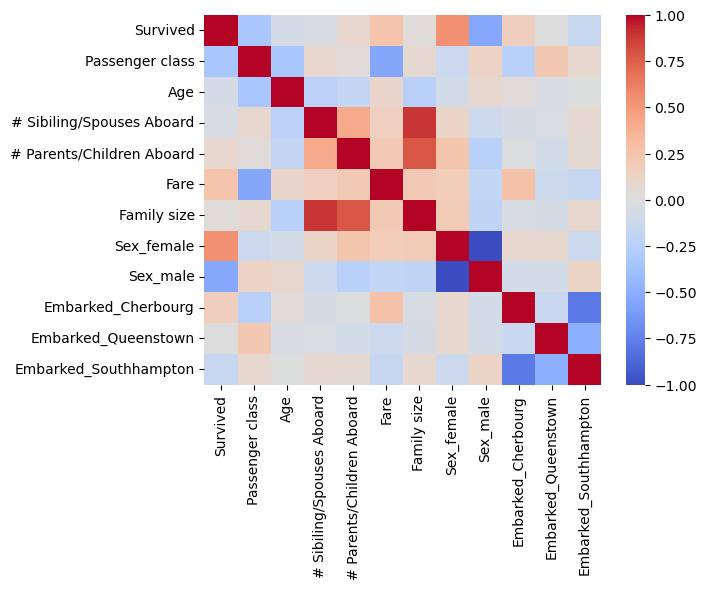

In [44]:
#heatmap
corr = encoded_df.corr()
sns.heatmap(corr, cmap='coolwarm') #can add annot=True to annotate the squares, but can get quite messy
plt.show()

We can see the correlation among variables and the target (Survived). It is important to note which feature are correlated with the target and each other.

Scatter/Pair plots and heat maps are usually the bare minimum and it worth exploring other features in relation to the target and each other.


In [22]:
copy.head()

,Survived,Passenger class,Sex,Age,# Sibiling/Spouses Aboard,# Parents/Children Aboard,Fare,Embarked,Family size
0,0,3,male,22.0,1,0,7.25,Southhampton,1
1,1,1,female,38.0,1,0,71.28,Cherbourg,1
2,1,3,female,26.0,0,0,7.92,Southhampton,0
3,1,1,female,35.0,1,0,53.10,Southhampton,1
4,0,3,male,35.0,0,0,8.05,Southhampton,0


We can check the survival breakdown over class, sex, and embarked - percent or count is fine

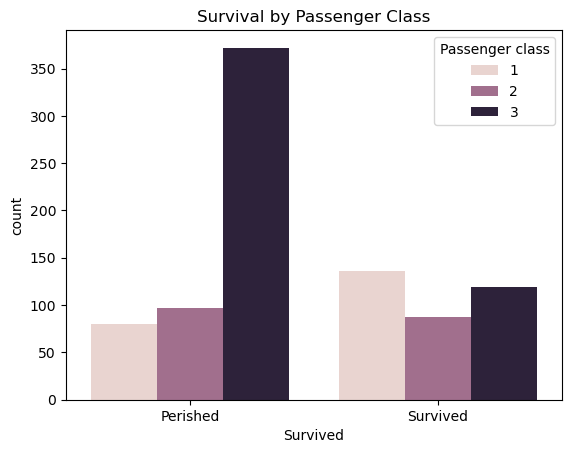

In [15]:
#survival by passenger class
sns.countplot(x='Survived', hue='Passenger class', data=copy)
plt.xticks(ticks=[0, 1], labels=['Perished', 'Survived'])
plt.title('Survival by Passenger Class')
plt.show()


The majority of people who perished were from third class

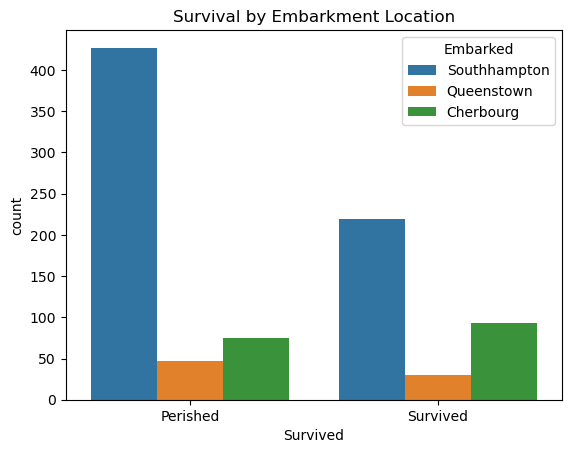

In [16]:
#survival by embarked location
sns.countplot(data=copy, x='Survived', hue='Embarked')
plt.xticks(ticks=[0, 1], labels=['Perished', 'Survived'])
plt.title('Survival by Embarkment Location')
plt.show()

Most people who embarked from Southhampton perished

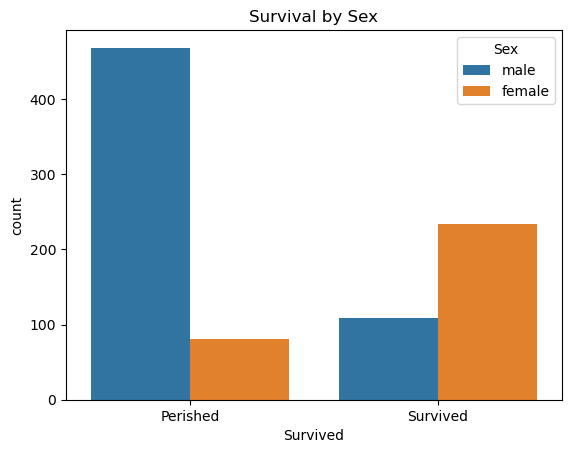

In [23]:
#survial count by sex
sns.countplot(data=copy, x='Survived', hue='Sex')
plt.xticks(ticks=[0, 1], labels=['Perished', 'Survived'])
plt.title('Survival by Sex')
plt.show()

Males perished more than their Female counterparts

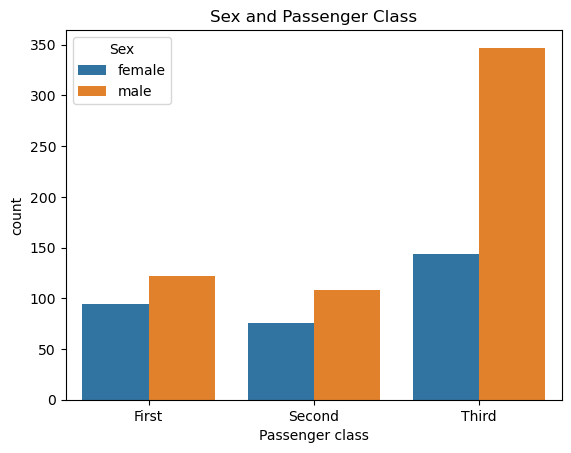

In [24]:
#passenger class and Sex
sns.countplot(data=copy, x='Passenger class', hue='Sex')
plt.xticks(ticks=[0, 1, 2], labels=['First', 'Second', 'Third'])
plt.title('Sex and Passenger Class')
plt.show()

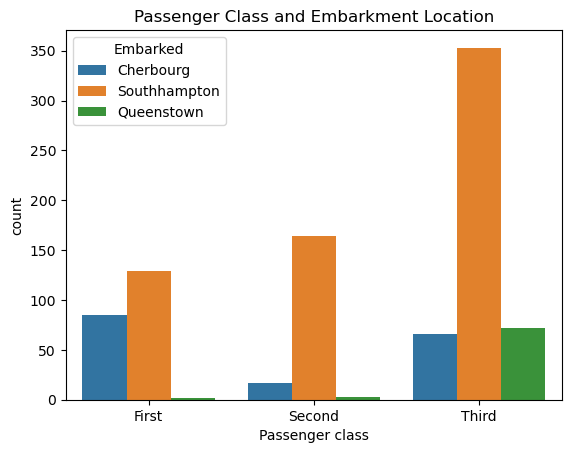

In [25]:
#passenger class and embarked
sns.countplot(data=copy, x='Passenger class', hue='Embarked')
plt.xticks(ticks=[0, 1, 2], labels=['First', 'Second', 'Third'])
plt.title('Passenger Class and Embarkment Location')
plt.show()

Southhampton appears to be the most popular port for each class, while Third class is most popular with Queenstown suggesting a lower socioeconomic environment


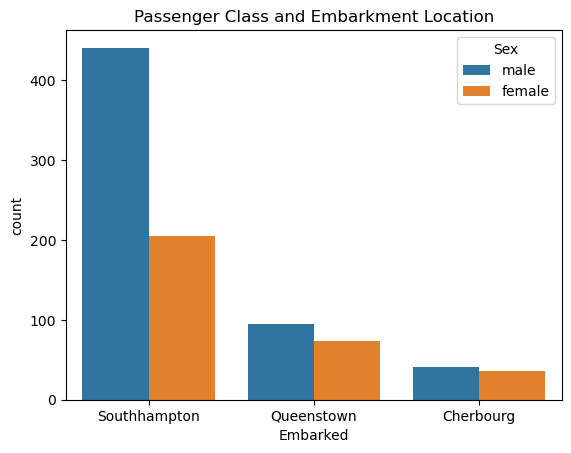

In [27]:
#Embarked and sex
sns.countplot(data=copy, x='Embarked', hue='Sex')
plt.xticks(ticks=[0, 1, 2], labels=['Southhampton', 'Queenstown', 'Cherbourg'])
plt.title('Passenger Class and Embarkment Location')
plt.show()

This brings us to the end of this EDA walkthrough. Every dataset is different as is the research problem. Usually Regression and Classification problems follow this EDA process. EDA for NLP is a bit different and would require its own tutorial.

Let's move on to statisitcal tests.